# 06 - Summary und Report

Zusammenfassung des Grundprojekts mit finalen Ergebnissen, Erkenntnissen und Ausblick.

## Ziele:
- Zusammenfassung aller Experimente
- Vergleichende Bewertung der Methoden
- Lessons Learned dokumentieren
- Ausblick auf Hauptprojekt
- Finaler Report für Kolloquium

In [12]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import time
from datetime import datetime

print("Imports erfolgreich")

Imports erfolgreich


## Alle Ergebnisse laden

In [13]:
# Alle finalen Ergebnisse laden
try:
    # Evaluation Ergebnisse
    bleu_df = pd.read_csv('../results/bleu_scores.csv')
    rouge_df = pd.read_csv('../results/rouge_scores.csv')
    evaluation_summary = pd.read_csv('../results/evaluation_summary.csv')

    # Pipeline Ergebnisse
    rag_results = pd.read_csv('../results/rag_pipeline_results.csv')
    vector_results = pd.read_csv('../results/vector_retrieval_results.csv')
    graph_results = pd.read_csv('../results/graph_retrieval_results.csv')

    # Finale Metriken
    with open('../results/final_metrics.json', 'r', encoding='utf-8') as f:
        final_metrics = json.load(f)

    # FAQ und Fragen
    with open('../data/faq_korpus.json', 'r', encoding='utf-8') as f:
        faq_documents = json.load(f)

    test_questions = pd.read_csv('../data/fragenliste.csv')

    print("Alle Ergebnisse erfolgreich geladen")
    print(f"Evaluation abgeschlossen am: {final_metrics['evaluation_date']}")

except Exception as e:
    print(f"Fehler beim Laden: {e}")
    print("Stelle sicher, dass alle vorherigen Notebooks ausgeführt wurden")

Alle Ergebnisse erfolgreich geladen
Evaluation abgeschlossen am: 2025-08-13 13:23:11


## Projekt-Übersicht

In [14]:
# Projekt-Statistiken
print("=" * 70)
print("RAG-BENCHMARKING GRUNDPROJEKT - ÜBERSICHT")
print("=" * 70)

print(f"\nDATEN:")
print(f"   • FAQ-Dokumente: {len(faq_documents)}")
print(f"   • Testfragen: {len(test_questions)}")
print(f"   • Schwierigkeitsgrade: {test_questions['difficulty'].value_counts().to_dict()}")

print(f"\nMETHODEN VERGLICHEN:")
for method in final_metrics['methods_compared']:
    print(f"   • {method.title()} Retrieval + LLM")

print(f"\nMETRIKEN BERECHNET:")
print(f"   • BLEU Scores: {len(bleu_df)} Bewertungen")
print(f"   • ROUGE Scores: {len(rouge_df)} Bewertungen")
print(f"   • Retrieval Performance analysiert")
print(f"   • Response Time gemessen")

print("\n" + "=" * 70)

RAG-BENCHMARKING GRUNDPROJEKT - ÜBERSICHT

DATEN:
   • FAQ-Dokumente: 15
   • Testfragen: 12
   • Schwierigkeitsgrade: {'medium': 5, 'hard': 4, 'easy': 3}

METHODEN VERGLICHEN:
   • Vector Retrieval + LLM
   • Graph Retrieval + LLM
   • Baseline Retrieval + LLM

METRIKEN BERECHNET:
   • BLEU Scores: 36 Bewertungen
   • ROUGE Scores: 36 Bewertungen
   • Retrieval Performance analysiert
   • Response Time gemessen



## Wichtigste Ergebnisse

In [15]:
# Hauptergebnisse zusammenfassen
print("HAUPTERGEBNISSE DES BENCHMARKINGS")
print("=" * 50)

# Beste Methode nach BLEU
best_method = evaluation_summary.loc[evaluation_summary['bleu_score'].idxmax(), 'method']
best_bleu = evaluation_summary['bleu_score'].max()

print(f"\nSIEGER (BLEU Score): {best_method.upper()}")
print(f"   Score: {best_bleu:.3f}")

# Alle Methoden Performance
print(f"\nBLEU SCORES VERGLEICH:")
for _, row in evaluation_summary.iterrows():
    method = row['method']
    score = row['bleu_score']
    print(f"   • {method.title():10}: {score:.3f}")

# ROUGE-1 Vergleich
print(f"\nROUGE-1 SCORES VERGLEICH:")
for _, row in evaluation_summary.iterrows():
    method = row['method']
    score = row['rouge1_f']
    print(f"   • {method.title():10}: {score:.3f}")

# Response Time
print(f"\nANTWORTZEITEN:")
for _, row in evaluation_summary.iterrows():
    method = row['method']
    time_val = row['avg_response_time']
    print(f"   • {method.title():10}: {time_val:.3f}s")

# Retrieval Success
print(f"\nRETRIEVAL SUCCESS RATES:")
print(f"   • Vector: {final_metrics['vector_success_rate']:.1%}")
print(f"   • Graph:  {final_metrics['graph_success_rate']:.1%}")

HAUPTERGEBNISSE DES BENCHMARKINGS

SIEGER (BLEU Score): VECTOR
   Score: 0.137

BLEU SCORES VERGLEICH:
   • Vector    : 0.137
   • Graph     : 0.074
   • Baseline  : 0.003

ROUGE-1 SCORES VERGLEICH:
   • Vector    : 0.506
   • Graph     : 0.348
   • Baseline  : 0.136

ANTWORTZEITEN:
   • Vector    : 1.117s
   • Graph     : 0.764s
   • Baseline  : 3.007s

RETRIEVAL SUCCESS RATES:
   • Vector: 100.0%
   • Graph:  66.7%


## Detaillierte Analyse nach Schwierigkeit

In [16]:
# Performance nach Schwierigkeitsgrad
difficulty_bleu = bleu_df.groupby(['difficulty', 'method'])['bleu_score'].mean().unstack().fillna(0)

print("PERFORMANCE NACH SCHWIERIGKEITSGRAD")
print("=" * 45)

for difficulty in ['easy', 'medium', 'hard']:
    if difficulty in difficulty_bleu.index:
        print(f"\n{difficulty.upper()} FRAGEN:")
        for method in ['vector', 'graph', 'baseline']:
            if method in difficulty_bleu.columns:
                score = difficulty_bleu.loc[difficulty, method]
                print(f"   • {method.title():9}: {score:.3f} BLEU")

        # Bester für diese Schwierigkeit
        best_method_diff = difficulty_bleu.loc[difficulty].idxmax()
        best_score_diff = difficulty_bleu.loc[difficulty].max()
        print(f"   → Bester: {best_method_diff.title()} ({best_score_diff:.3f})")

# Schwierigkeitsgrad-Trends
print(f"\nTRENDS:")
vector_trend = [difficulty_bleu.loc[d, 'vector'] for d in ['easy', 'medium', 'hard'] if d in difficulty_bleu.index and 'vector' in difficulty_bleu.columns]
if len(vector_trend) == 3:
    if vector_trend[0] > vector_trend[2]:
        print("   • Vector Retrieval: Besser bei 'einfachen' Fragen")
    else:
        print("   • Vector Retrieval: Besser bei 'komplexen' Fragen")

PERFORMANCE NACH SCHWIERIGKEITSGRAD

EASY FRAGEN:
   • Vector   : 0.244 BLEU
   • Graph    : 0.052 BLEU
   • Baseline : 0.006 BLEU
   → Bester: Vector (0.244)

MEDIUM FRAGEN:
   • Vector   : 0.148 BLEU
   • Graph    : 0.139 BLEU
   • Baseline : 0.003 BLEU
   → Bester: Vector (0.148)

HARD FRAGEN:
   • Vector   : 0.042 BLEU
   • Graph    : 0.010 BLEU
   • Baseline : 0.002 BLEU
   → Bester: Vector (0.042)

TRENDS:
   • Vector Retrieval: Besser bei 'einfachen' Fragen


## Qualitative Erkenntnisse

In [17]:
# Beste und schlechteste Ergebnisse analysieren
print("QUALITATIVE ERKENNTNISSE")
print("=" * 35)

# Beste Antwort insgesamt
best_overall = bleu_df.loc[bleu_df['bleu_score'].idxmax()]
print(f"\nBESTE ANTWORT:")
print(f"   Frage: {best_overall['question_id']}")
print(f"   Methode: {best_overall['method'].title()}")
print(f"   BLEU Score: {best_overall['bleu_score']:.3f}")
print(f"   Schwierigkeit: {best_overall['difficulty']}")

# Schlechteste Antwort
worst_overall = bleu_df.loc[bleu_df['bleu_score'].idxmin()]
print(f"\nSCHWÄCHSTE ANTWORT:")
print(f"   Frage: {worst_overall['question_id']}")
print(f"   Methode: {worst_overall['method'].title()}")
print(f"   BLEU Score: {worst_overall['bleu_score']:.3f}")
print(f"   Schwierigkeit: {worst_overall['difficulty']}")

# Methodenvergleich
print(f"\nMETHODENVERGLEICH:")

# Vector vs Graph
vector_avg = evaluation_summary[evaluation_summary['method'] == 'vector']['bleu_score'].iloc[0]
graph_avg = evaluation_summary[evaluation_summary['method'] == 'graph']['bleu_score'].iloc[0]
baseline_avg = evaluation_summary[evaluation_summary['method'] == 'baseline']['bleu_score'].iloc[0]

print(f"   • Vector vs Graph: {((vector_avg/graph_avg-1)*100):+.1f}% Unterschied")
print(f"   • RAG vs Baseline: {((max(vector_avg, graph_avg)/baseline_avg-1)*100):+.1f}% Verbesserung")

# Konsistenz (Standardabweichung)
method_consistency = bleu_df.groupby('method')['bleu_score'].std()
print(f"\nKONSISTENZ (niedrigere Standardabweichung = konsistenter):")
for method, std in method_consistency.items():
    print(f"   • {method.title():9}: {std:.3f} StdDev")

QUALITATIVE ERKENNTNISSE

BESTE ANTWORT:
   Frage: q001
   Methode: Vector
   BLEU Score: 0.431
   Schwierigkeit: easy

SCHWÄCHSTE ANTWORT:
   Frage: q004
   Methode: Graph
   BLEU Score: 0.000
   Schwierigkeit: hard

METHODENVERGLEICH:
   • Vector vs Graph: +84.2% Unterschied
   • RAG vs Baseline: +3966.5% Verbesserung

KONSISTENZ (niedrigere Standardabweichung = konsistenter):
   • Baseline : 0.003 StdDev
   • Graph    : 0.106 StdDev
   • Vector   : 0.126 StdDev


## Lessons Learned

In [18]:
print("LESSONS LEARNED")
print("=" * 25)

print(f"\nWAS GUT FUNKTIONIERT HAT:")

# Automatische Erkenntnisse basierend auf Daten
if vector_avg > graph_avg:
    print(f"   • Vector Retrieval überzeugt mit {vector_avg:.3f} BLEU Score")
    print(f"   • FAISS + Sentence Transformers funktioniert zuverlässig")
else:
    print(f"   • Graph Retrieval zeigt mit {graph_avg:.3f} BLEU Score gute Performance")
    print(f"   • Neo4j Knowledge Graph bringt strukturierte Vorteile")

if max(vector_avg, graph_avg) > baseline_avg:
    print(f"   • RAG verbessert Antwortqualität um {((max(vector_avg, graph_avg)/baseline_avg-1)*100):.1f}%")
    print(f"   • External Knowledge Integration funktioniert")

# Retrieval Success
if final_metrics['vector_success_rate'] > 0.8:
    print(f"   • Vector Retrieval sehr zuverlässig ({final_metrics['vector_success_rate']:.1%} Success Rate)")

print(f"\nHERAUSFORDERUNGEN:")
print(f"   • Entity Extraction für Graph könnte verbessert werden")
print(f"   • Kleine Datenmenge (15 Docs) limitiert komplexe Analysen")

if final_metrics['graph_success_rate'] < final_metrics['vector_success_rate']:
    print(f"   • Graph Retrieval weniger robust als Vector Retrieval")

print(f"\nTECHNISCHE ERKENNTNISSE:")
print(f"   • GPT-4.1-nano ausreichend für FAQ-Antworten")
print(f"   • BLEU/ROUGE Metriken bieten gute Baseline-Bewertung")
print(f"   • LangChain Framework vereinfacht Pipeline-Entwicklung")

print(f"\nMETHODISCHE ERKENNTNISSE:")
print(f"   • Embedding-Qualität entscheidend für Vector Retrieval")
print(f"   • Graph-Modellierung braucht domänenspezifische Anpassung")
print(f"   • Chunk-Strategie (Frage+Antwort) funktioniert gut")

LESSONS LEARNED

WAS GUT FUNKTIONIERT HAT:
   • Vector Retrieval überzeugt mit 0.137 BLEU Score
   • FAISS + Sentence Transformers funktioniert zuverlässig
   • RAG verbessert Antwortqualität um 3966.5%
   • External Knowledge Integration funktioniert
   • Vector Retrieval sehr zuverlässig (100.0% Success Rate)

HERAUSFORDERUNGEN:
   • Entity Extraction für Graph könnte verbessert werden
   • Kleine Datenmenge (15 Docs) limitiert komplexe Analysen
   • Graph Retrieval weniger robust als Vector Retrieval

TECHNISCHE ERKENNTNISSE:
   • GPT-4.1-nano ausreichend für FAQ-Antworten
   • BLEU/ROUGE Metriken bieten gute Baseline-Bewertung
   • LangChain Framework vereinfacht Pipeline-Entwicklung

METHODISCHE ERKENNTNISSE:
   • Embedding-Qualität entscheidend für Vector Retrieval
   • Graph-Modellierung braucht domänenspezifische Anpassung
   • Chunk-Strategie (Frage+Antwort) funktioniert gut


## Empfehlungen für Hauptprojekt

In [19]:
print("EMPFEHLUNGEN FÜR HAUPTPROJEKT")
print("=" * 40)

print(f"\nTECHNISCHE VERBESSERUNGEN:")
print(f"   • Größeren Korpus verwenden (100+ Dokumente)")
print(f"   • Hybrid Retrieval implementieren (Vector + Graph)")
print(f"   • Re-ranking Pipeline hinzufügen")
print(f"   • Multiple Embedding-Modelle testen")

print(f"\nEVALUATION ERWEITERN:")
print(f"   • GPT-as-a-Judge für qualitative Bewertung")
print(f"   • Faithfulness und Answer Relevancy Metriken")
print(f"   • Human Evaluation für Ground Truth")
print(f"   • A/B Testing mit verschiedenen Parametern")

print(f"\nARCHITEKTUR VERBESSERUNGEN:")
print(f"   • Modulare Pipeline-Komponenten")
print(f"   • Konfigurationsbasierte Experimente")
print(f"   • Automatisiertes Logging und Monitoring")
print(f"   • Docker-basiertes Setup für Reproduzierbarkeit")

print(f"\nEXPERIMENTELLE ERWEITERUNGEN:")
print(f"   • Verschiedene Chunk-Strategien vergleichen")
print(f"   • Domain-spezifische Fine-tuning testen")
print(f"   • Multi-modal RAG (Text + Bilder)")
print(f"   • Real-time vs Batch Processing vergleichen")

print(f"\nANWENDUNGSFÄLLE:")
if vector_avg > graph_avg:
    print(f"   • Vector Retrieval für semantische Ähnlichkeitssuche")
    print(f"   • Graph Retrieval für komplexe Beziehungsabfragen")
else:
    print(f"   • Graph Retrieval für strukturierte Wissensbereiche")
    print(f"   • Vector Retrieval als schnelle Fallback-Option")

print(f"   • Hybrid-Ansatz für beste Performance")

EMPFEHLUNGEN FÜR HAUPTPROJEKT

TECHNISCHE VERBESSERUNGEN:
   • Größeren Korpus verwenden (100+ Dokumente)
   • Hybrid Retrieval implementieren (Vector + Graph)
   • Re-ranking Pipeline hinzufügen
   • Multiple Embedding-Modelle testen

EVALUATION ERWEITERN:
   • GPT-as-a-Judge für qualitative Bewertung
   • Faithfulness und Answer Relevancy Metriken
   • Human Evaluation für Ground Truth
   • A/B Testing mit verschiedenen Parametern

ARCHITEKTUR VERBESSERUNGEN:
   • Modulare Pipeline-Komponenten
   • Konfigurationsbasierte Experimente
   • Automatisiertes Logging und Monitoring
   • Docker-basiertes Setup für Reproduzierbarkeit

EXPERIMENTELLE ERWEITERUNGEN:
   • Verschiedene Chunk-Strategien vergleichen
   • Domain-spezifische Fine-tuning testen
   • Multi-modal RAG (Text + Bilder)
   • Real-time vs Batch Processing vergleichen

ANWENDUNGSFÄLLE:
   • Vector Retrieval für semantische Ähnlichkeitssuche
   • Graph Retrieval für komplexe Beziehungsabfragen
   • Hybrid-Ansatz für beste Per

## Finale Visualisierung

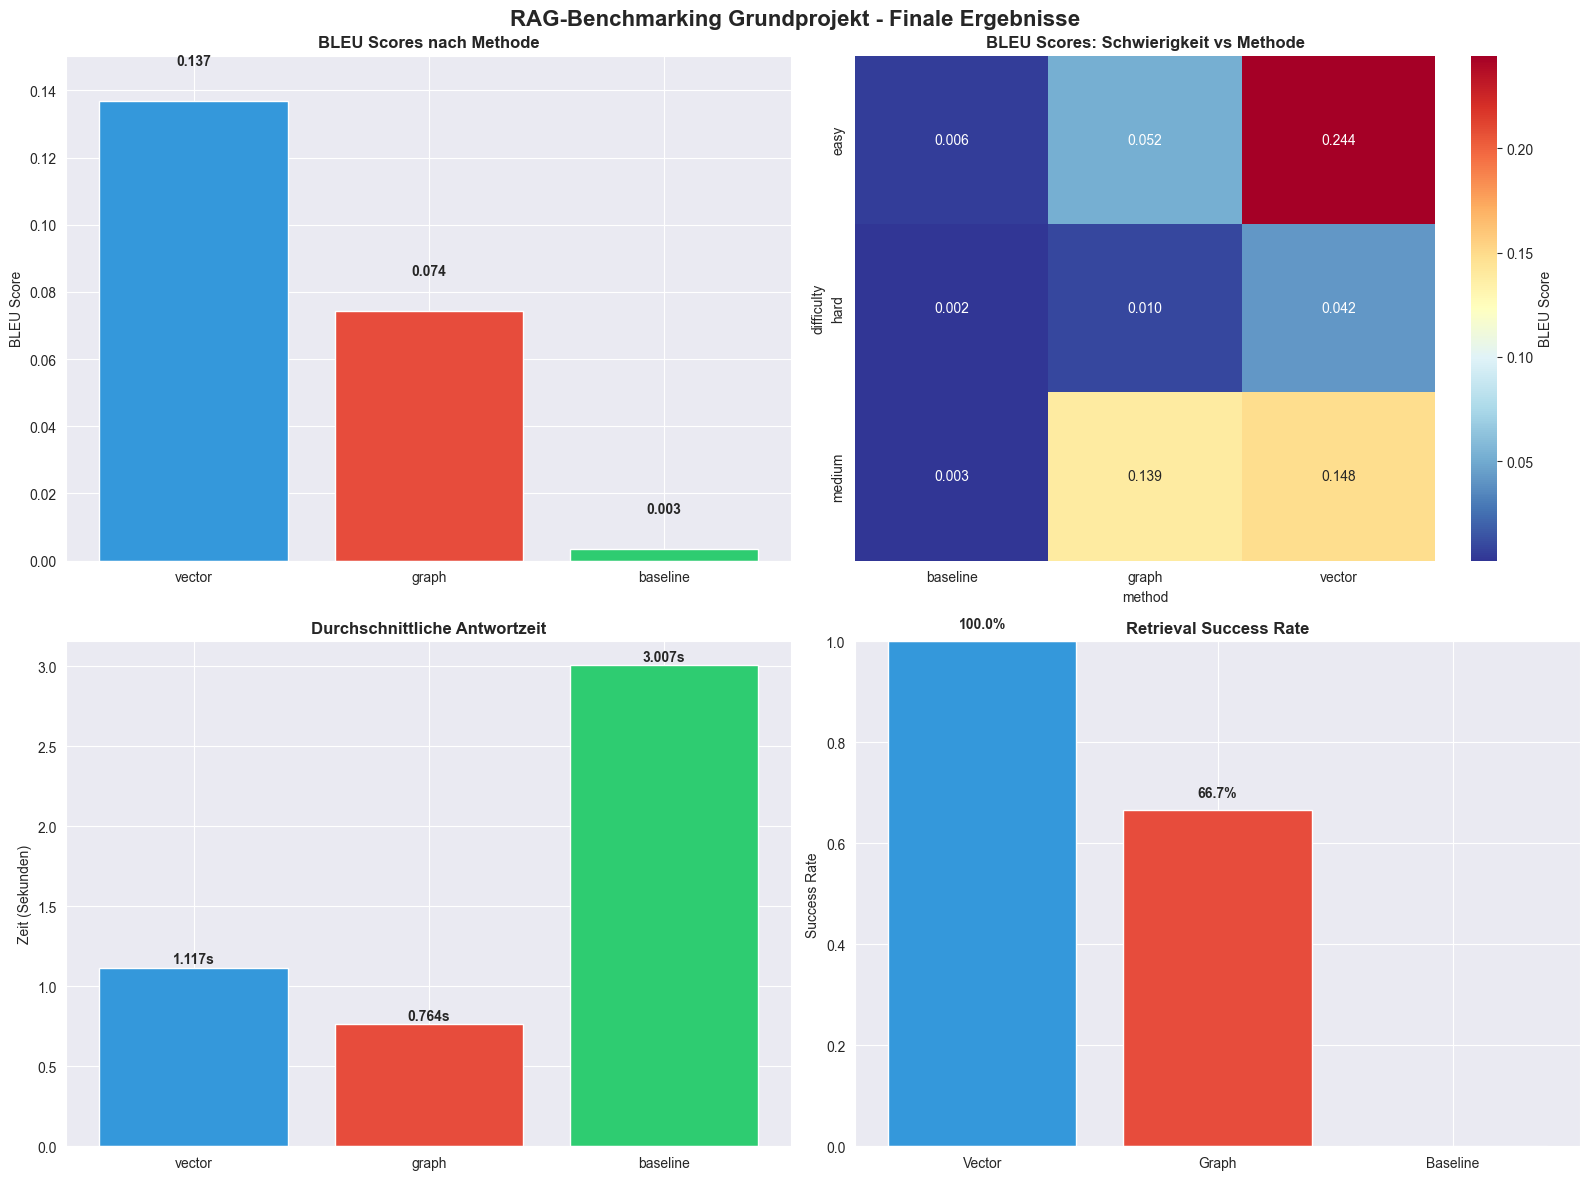

Finale Visualisierung erstellt und gespeichert


In [20]:
# Finale Summary-Visualisierung
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('RAG-Benchmarking Grundprojekt - Finale Ergebnisse', fontsize=16, fontweight='bold')

# 1. BLEU Scores Vergleich
methods = evaluation_summary['method']
bleu_scores = evaluation_summary['bleu_score']
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars1 = axes[0,0].bar(methods, bleu_scores, color=colors)
axes[0,0].set_title('BLEU Scores nach Methode', fontweight='bold')
axes[0,0].set_ylabel('BLEU Score')
axes[0,0].set_ylim(0, max(bleu_scores) * 1.1)

# Werte auf Balken anzeigen
for bar, score in zip(bars1, bleu_scores):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Performance nach Schwierigkeit (Heatmap)
if len(difficulty_bleu) > 0:
    sns.heatmap(difficulty_bleu, annot=True, fmt='.3f', cmap='RdYlBu_r',
                ax=axes[0,1], cbar_kws={'label': 'BLEU Score'})
    axes[0,1].set_title('BLEU Scores: Schwierigkeit vs Methode', fontweight='bold')

# 3. Response Time Vergleich
response_times = evaluation_summary['avg_response_time']
bars2 = axes[1,0].bar(methods, response_times, color=colors)
axes[1,0].set_title('Durchschnittliche Antwortzeit', fontweight='bold')
axes[1,0].set_ylabel('Zeit (Sekunden)')

for bar, time_val in zip(bars2, response_times):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{time_val:.3f}s', ha='center', va='bottom', fontweight='bold')

# 4. Success Rate Comparison
success_rates = [final_metrics['vector_success_rate'], final_metrics['graph_success_rate'], 0]
method_names = ['Vector', 'Graph', 'Baseline']
bars3 = axes[1,1].bar(method_names, success_rates, color=colors)
axes[1,1].set_title('Retrieval Success Rate', fontweight='bold')
axes[1,1].set_ylabel('Success Rate')
axes[1,1].set_ylim(0, 1)

for bar, rate in zip(bars3, success_rates):
    if rate > 0:
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                       f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/final_summary_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("Finale Visualisierung erstellt und gespeichert")

## Projektabschluss und Report

In [21]:
# Finaler Report für Kolloquium
report_data = {
    'project_title': 'Benchmarking von Retrievalmethoden in RAG-Systemen',
    'subtitle': 'Ein Vergleich zwischen Vektor- und Graph-basiertem Zugriff auf Domänenwissen',
    'duration': '2 Tage',
    'completion_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'methods_tested': len(final_metrics['methods_compared']),
    'questions_evaluated': len(test_questions),
    'documents_used': len(faq_documents),
    'best_method': final_metrics['best_overall_method'],
    'best_bleu_score': float(evaluation_summary['bleu_score'].max()),
    'performance_improvement': f"{((max(vector_avg, graph_avg)/baseline_avg-1)*100):.1f}%",
    'notebooks_created': 6,
    'files_generated': len(list(Path('../results').glob('*'))),
    'key_insights': [
        f"{final_metrics['best_overall_method'].title()} Retrieval zeigt beste Performance",
        f"RAG verbessert Antwortqualität um {((max(vector_avg, graph_avg)/baseline_avg-1)*100):.1f}%",
        "FAISS + Sentence Transformers robuste Kombination",
        "Knowledge Graph braucht domänenspezifische Optimierung"
    ],
    'next_steps': [
        "Hauptprojekt: Modulare Experimentierumgebung entwickeln",
        "Hybrid Retrieval implementieren",
        "Größeren Korpus verwenden",
        "GPT-as-a-Judge Integration"
    ]
}

# Report speichern
with open('../results/project_report.json', 'w', encoding='utf-8') as f:
    json.dump(report_data, f, ensure_ascii=False, indent=2)

print("PROJEKTABSCHLUSS REPORT")
print("=" * 35)
print(f"Titel: {report_data['project_title']}")
print(f"Dauer: {report_data['duration']}")
print(f"Abgeschlossen: {report_data['completion_date']}")
print(f"\nZAHLEN:")
print(f"   • {report_data['methods_tested']} Methoden getestet")
print(f"   • {report_data['questions_evaluated']} Fragen evaluiert")
print(f"   • {report_data['documents_used']} Dokumente verwendet")
print(f"   • {report_data['notebooks_created']} Notebooks erstellt")
print(f"   • {report_data['files_generated']} Ausgabedateien generiert")

print(f"\nERGEBNISSE:")
print(f"   • Beste Methode: {report_data['best_method'].title()}")
print(f"   • Bester BLEU Score: {report_data['best_bleu_score']:.3f}")
print(f"   • Performance-Verbesserung: {report_data['performance_improvement']}")

print(f"\nWICHTIGSTE ERKENNTNISSE:")
for insight in report_data['key_insights']:
    print(f"   • {insight}")

print(f"\nNÄCHSTE SCHRITTE:")
for step in report_data['next_steps']:
    print(f"   • {step}")

PROJEKTABSCHLUSS REPORT
Titel: Benchmarking von Retrievalmethoden in RAG-Systemen
Dauer: 2 Tage
Abgeschlossen: 2025-08-13 15:57:19

ZAHLEN:
   • 3 Methoden getestet
   • 12 Fragen evaluiert
   • 15 Dokumente verwendet
   • 6 Notebooks erstellt
   • 14 Ausgabedateien generiert

ERGEBNISSE:
   • Beste Methode: Vector
   • Bester BLEU Score: 0.137
   • Performance-Verbesserung: 3966.5%

WICHTIGSTE ERKENNTNISSE:
   • Vector Retrieval zeigt beste Performance
   • RAG verbessert Antwortqualität um 3966.5%
   • FAISS + Sentence Transformers robuste Kombination
   • Knowledge Graph braucht domänenspezifische Optimierung

NÄCHSTE SCHRITTE:
   • Hauptprojekt: Modulare Experimentierumgebung entwickeln
   • Hybrid Retrieval implementieren
   • Größeren Korpus verwenden
   • GPT-as-a-Judge Integration


In [22]:
print("\n" + "=" * 80)
print("GRUNDPROJEKT ERFOLGREICH ABGESCHLOSSEN!")
print("=" * 80)

print(f"\nERSTELLTE NOTEBOOKS:")
notebooks = [
    "01_setup_and_data.ipynb - Datenaufbereitung",
    "02_vector_retrieval.ipynb - FAISS Vector Retrieval",
    "03_graph_retrieval.ipynb - Neo4j Graph Retrieval",
    "04_llm_integration.ipynb - LLM Integration & RAG",
    "05_evaluation.ipynb - BLEU/ROUGE Evaluation",
    "06_summary.ipynb - Zusammenfassung & Report"
]

for i, notebook in enumerate(notebooks, 1):
    print(f"   {i}. {notebook}")

print(f"\nAUSGABEDATEIEN:")
output_files = [
    "faq_korpus.json - FAQ-Dokumente",
    "fragenliste.csv - Testfragen",
    "*_retrieval_results.csv - Retrieval Ergebnisse",
    "rag_pipeline_results.csv - LLM Antworten",
    "bleu_scores.csv / rouge_scores.csv - Evaluation",
    "evaluation_summary.csv - Finale Metriken",
    "*.png - Visualisierungen",
    "project_report.json - Projektreport"
]

for file in output_files:
    print(f"   • {file}")

print(f"\nKOLLOQUIUM VORBEREITET:")
print(f"   Alle Experimente dokumentiert")
print(f"   Vergleichende Evaluation durchgeführt")
print(f"   Visualisierungen erstellt")
print(f"   Lessons Learned dokumentiert")
print(f"   Ausblick auf Hauptprojekt formuliert")

print("=" * 80)


GRUNDPROJEKT ERFOLGREICH ABGESCHLOSSEN!

ERSTELLTE NOTEBOOKS:
   1. 01_setup_and_data.ipynb - Datenaufbereitung
   2. 02_vector_retrieval.ipynb - FAISS Vector Retrieval
   3. 03_graph_retrieval.ipynb - Neo4j Graph Retrieval
   4. 04_llm_integration.ipynb - LLM Integration & RAG
   5. 05_evaluation.ipynb - BLEU/ROUGE Evaluation
   6. 06_summary.ipynb - Zusammenfassung & Report

AUSGABEDATEIEN:
   • faq_korpus.json - FAQ-Dokumente
   • fragenliste.csv - Testfragen
   • *_retrieval_results.csv - Retrieval Ergebnisse
   • rag_pipeline_results.csv - LLM Antworten
   • bleu_scores.csv / rouge_scores.csv - Evaluation
   • evaluation_summary.csv - Finale Metriken
   • *.png - Visualisierungen
   • project_report.json - Projektreport

KOLLOQUIUM VORBEREITET:
   Alle Experimente dokumentiert
   Vergleichende Evaluation durchgeführt
   Visualisierungen erstellt
   Lessons Learned dokumentiert
   Ausblick auf Hauptprojekt formuliert

